In [3]:

from astropy.io import fits
import numpy as np
import glob
from astropy import units as u
#Import astropy cutout2d
from astropy.nddata.utils import Cutout2D
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

#Use astropy to load in the fits files 'coadd.fits' and 'coadd600.fits'
ha = fits.open('NGC4402_htight.fits') 
R = fits.open('NGC4402_Rtight.fits')
C = fits.open('continuumsubtight.fits')

#Show the headers of the fits files
print(ha[0].header)









SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  600                                                  NAXIS2  =                  250                                                  EQUINOX =   2.000000000000E+03 / Mean equinox                                   MJD-OBS =   5.966017589700E+04 / Modified Julian date at start                  RADESYS = 'ICRS    '           / Astrometric system                             CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              CUNIT1  = 'deg     '           / Axis unit                                      CRVAL1  =   1.865291666667E+02 / World coordinate on this axis                  CRPIX1  =   9.630000000000E+02 / Reference pixel on this axis                   CD1_1   =  -2.138888888889E-04 / Linear 

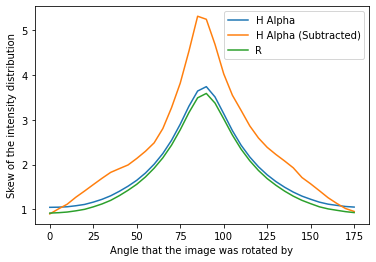

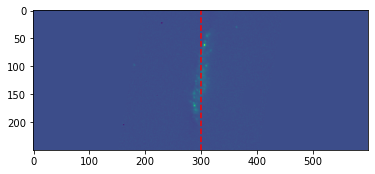

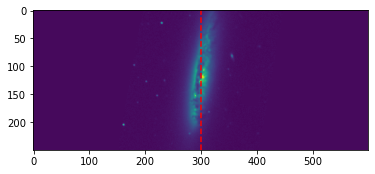

In [58]:

from matplotlib import pyplot as plt
hdata = ha[0].data
Cdata = C[0].data
Rdata = R[0].data
#Take the columns of ha[0].data and sum them to collapse the array
#Turn the values within  15 pixels of (286,221) to 0 (this is a bright star we want to not take into account)
hdata[205:235, 270:300] =0
Cdata[205:235, 270:300] =0
Rdata[205:235, 270:300] =0


from scipy.ndimage.interpolation import rotate
from scipy.stats import skew

skewha = []
skewC = []
skewR = []

angles = np.arange(0,180,5)
#We do some rotating
for angle in angles:
    rotatedha = rotate(hdata, angle=angle, reshape=False)
    ha_rot_sum = np.sum(rotatedha, axis=0)
    #plt.plot(range(len(ha_rot_sum)), ha_rot_sum/max(ha_rot_sum))
    skewha.append(skew(ha_rot_sum/max(ha_rot_sum)))

    rotatedC = rotate(Cdata, angle=angle, reshape=False)
    C_rot_sum = np.sum(rotatedC, axis=0)
    #plt.plot(range(len(C_rot_sum)), C_rot_sum/max(C_rot_sum))
    skewC.append(skew(C_rot_sum/max(C_rot_sum)))

    rotatedR = rotate(Rdata, angle=angle, reshape=False)
    R_rot_sum = np.sum(rotatedR, axis=0)
    #plt.plot(range(len(R_rot_sum)), R_rot_sum/max(R_rot_sum))
    skewR.append(skew(R_rot_sum/max(R_rot_sum)))


plt.show()

plt.plot(angles, skewha, label='H Alpha')
plt.plot(angles, skewC, label='H Alpha (Subtracted)')
plt.plot(angles, skewR, label='R')
plt.xlabel('Angle that the image was rotated by')
plt.ylabel('Skew of the intensity distribution')
plt.legend()
plt.show()

#Maximal for angle = 80 deg (more or less)
#So lets show what the continuum subtracted h-alpha looks like when rotated 80 degrees
#We indeed see that most of the intensity is on the right side of the image (positive skew) as expected
rotated_img = rotate(Cdata, angle=80, reshape=False)
plt.imshow(rotated_img)
plt.axvline(x=300, color='r', ls='--')
plt.show()

#Let's show
rotated_img = rotate(Rdata, angle=80, reshape=False)
plt.imshow(rotated_img)
plt.axvline(x=300, color='r', ls='--')
